**Goals**
1. We will recall partial feedback linearization (PFL) technique and consider implementation on a Cart-Pole System.
2. Perform generalized feedback linearization for a single-input system.


# **Partial Feedback linearization**


## **Example 1: Cart-pole System**

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1O1iM6MByfMyrO0txAMFb_miOqPNzFAvm" align="center" hspace="350px" vspace="0px"></p>

In the cart-pole system, the motions of a pendlum affects the dynamics of the cart. Therefore, we can design a feedback controller to linearize the the dynamics of a pendulum. 

**System Dynamics** 

Recall the dynamics of cart-pole system:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {p}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{p} \cos \theta  \\
\end{cases}
\end{equation}

where $\theta$ is angle of the pendulum measured from the upper equilibrium and $p$ is position of cart


Choosing the state to be $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$, one may rewrite this dynamics in the state-space form as:

\begin{equation}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\ 
\ddot{\theta} \\ 
\dot{p} \\ 
\ddot{p}
\end{bmatrix} 
= 
\begin{bmatrix}
\dot{\theta} \\ 
\frac{(M+m)g \sin \theta - mL \dot{\theta}^2 \sin\theta \cos\theta}{(M + m\sin^2 \theta)L} \\ 
\dot{x} \\ 
\frac{mg\sin\theta \cos\theta - mL\dot{\theta}^2 \sin \theta}{M + m\sin^2 \theta} \\ 
\end{bmatrix} 
+
\begin{bmatrix}
0 \\ 
\frac{\cos\theta}{(M + m\sin^2 \theta)L} \\ 
0 \\ 
\frac{1}{M + m\sin^2 \theta} \\ 
\end{bmatrix} u
\end{equation}


For simplicity **we can omit all the parameters** and consider the following system:
<!-- \begin{equation}
2\ddot{p} + \ddot{\theta} \cos{\theta} - \dot{\theta}^2 \sin{\theta} = u_p \\
\ddot{p}\cos{\theta} + \ddot{\theta} + \sin{\theta} = 0
\end{equation} -->
\begin{equation}
\begin{cases}
2\ddot{p} - \ddot{\theta} \cos{\theta} + \dot{\theta}^2 \sin{\theta} = u \\
\ddot{\theta} - \sin{\theta} - \ddot{p}\cos{\theta} = 0
\end{cases}
\end{equation}

From the second equation we can derive $\ddot{\theta}$ and sustitute the obtained expression to the first equation. As a result we get:

\begin{equation}
\begin{cases}
\ddot{p}(2-\cos^2{\theta}) - \sin{\theta}\cos{\theta} + \dot{\theta}^2\sin{\theta} = u \\
\ddot{\theta} = \ddot{p}\cos{\theta} + \sin{\theta}
\end{cases}
\end{equation}

By applying feedback control 
\begin{equation}
u = \ddot{p}_d(2-\cos^2{\theta}) - \sin{\theta}\cos{\theta} + \dot{\theta}^2\sin{\theta}
\end{equation}

results in

\begin{equation}
\begin{cases}
\ddot{p} = \ddot{p}_d \\
\ddot{\theta} = \ddot{p}_d\cos{\theta} + \sin{\theta}
\end{cases}
\end{equation}

**System parameters**: 

Let us choose the following parameters:

In [6]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint 

In [7]:
# Time settings
t0 = 0                     # Initial time 
tf = 20                    # Final time
N = int(2E3)               # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point 
theta_0 = 0.3
p_0 = 0.0

# Set initial state 
x0 = [theta_0, # Initial pendulum angle
      0,       # Initial pendulum angular speed
      p_0,     # Initial cart position
      0]       # Initial cart speed

In [8]:
s, c = np.sin, np.cos
# Nonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    ddp = (u + s(theta) * c(theta) - dtheta ** 2 * s(theta)) / (2 - c(theta)**2)
    ddtheta = ddp * c(theta) + s(theta)
    return dtheta, ddtheta, dp, ddp

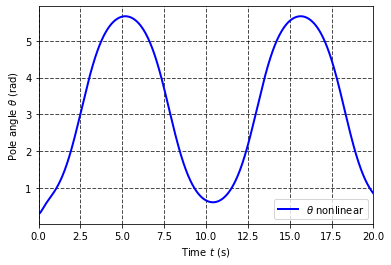

In [9]:
def sys_ode(x, t):
    # Linear controller
    u = control(x, t)
    # Nonlinear dynamics
    dx = f(x, u)
    return dx


def control(x, t):
    theta, dtheta, p, dp = x
    p_des, dp_des, ddp_des = 0.4, 0., 0
    u_fc = (2 - c(theta)**2) * ddp_des - s(theta) * c(theta) + dtheta ** 2 * s(theta)
    K_p = 25
    K_d = 10
    u_PD = K_p * (p_des - p) + K_d * (dp_des - dp)
    return u_fc + u_PD


# integrate system "sys_ode" from initial state x0
x_nl = odeint(sys_ode, x0, t) 
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3] 

# Plot the result
plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend(loc='best')
xlim([t0, tf])
ylabel(r'Pole angle $\theta$ (rad)')
xlabel(r'Time $t$ (s)')
show()

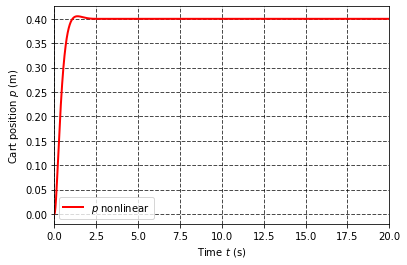

In [10]:
plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend(loc='best')
xlim([t0, tf])
ylabel(r'Cart position $p$ (m)')
xlabel(r'Time $t$ (s)')
show()

\begin{equation}
\begin{cases}
\ddot{p}(2-\cos^2{\theta}) - \sin{\theta}\cos{\theta} + \dot{\theta}^2\sin{\theta} = u \\
\ddot{\theta} = \ddot{p}\cos{\theta} + \sin{\theta}
\end{cases}
\end{equation}

From the second equation from the system above we can derive $\ddot{p}$ as
\begin{equation}
\ddot{p} = \frac{1}{\cos{\theta}} (\ddot{\theta} - \sin{\theta})
\end{equation}

and substitute this expression to the first equation of the system above. As a result, we get

\begin{equation}
\begin{cases}
\ddot{p} = \frac{1}{\cos{\theta}} (\ddot{\theta} - \sin{\theta}) \\
\ddot{\theta} (\frac{2}{\cos{\theta}} - \cos{\theta}) - 2 \tan{\theta} + \dot{\theta}^2\sin{\theta} = u
\end{cases}
\end{equation}

Let's apply the following feedback control
\begin{equation}
u = \ddot{\theta}_d  (\frac{2}{\cos{\theta}} - \cos{\theta}) - 2\tan{\theta} + \dot{\theta}^2 \sin{\theta}
\end{equation}

In the end we will get the following dynamics
\begin{equation}
\begin{cases}
\ddot{\theta} = \ddot{\theta}_d \\
\ddot{p} =  \frac{1}{\cos{\theta}} (\ddot{\theta}_d - \sin{\theta})
\end{cases}
\end{equation}

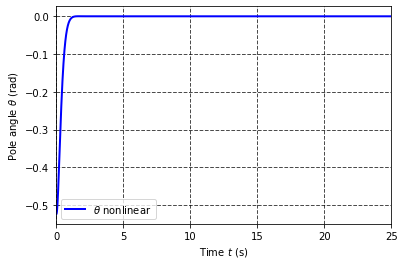

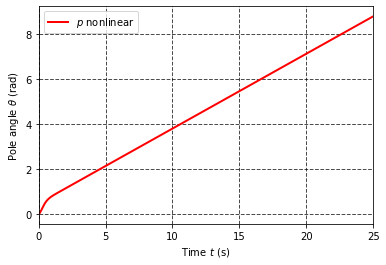

In [11]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint 

s, c = np.sin, np.cos
# Nonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    ddtheta = (u-2*(s(theta)/c(theta))+dtheta**2*s(theta))/(2/c(theta)-c(theta))
    ddp = ddtheta/c(theta) - s(theta)/c(theta)
    return dtheta, ddtheta, dp, ddp

def sys_ode(x, t):
    # Linear controller
    u = control(x, t)
    # Nonlinear dynamics
    dx = f(x, u)
    return dx


def control(x, t):
    theta, dtheta, p, dp = x
    theta_des, dtheta_des, ddtheta_des = 0, 0., 0
    u_fc = 2*((ddtheta_des)/(c(theta))-(s(theta))/(c(theta))) - ddtheta_des*c(theta) + s(theta)*dtheta**2
    K_p = 25
    K_d = 10
    u_PD = K_p * (theta_des - theta) + K_d * (dtheta_des - dtheta)
    return u_fc + u_PD


# Time settings
t0 = 0                     # Initial time 
tf = 25                    # Final time
N = int(2E3)               # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point 
theta_0 = 0-np.pi/6
# theta_0 = 
p_0 = 0.0

# Set initial state 
x0 = [theta_0, # Initial pendulum angle
      0,       # Initial pendulum angular speed
      p_0,     # Initial cart position
      0]       # Initial cart speed



# integrate system "sys_ode" from initial state x0
x_nl = odeint(sys_ode, x0, t) 
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3] 

# Plot the result
plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend(loc='best')
xlim([t0, tf])
# xlim([1, 5])
ylabel(r'Pole angle $\theta$ (rad)')
xlabel(r'Time $t$ (s)')
show()
plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend(loc='best')
xlim([t0, tf])
# xlim([1, 5])
ylabel(r'Pole angle $\theta$ (rad)')
xlabel(r'Time $t$ (s)')
show()

# **Generalized Feedback Linearization**


## **Example 2: Flexible Joint Link**
The system is the nonlinear pendulum with finite stifness in the joint :
<p><img alt="Compliant pendulum" height="200px" src="https://drive.google.com/uc?id=1HZbitkGnsV0TdRhSKoFADmQhpbeSh4uW" align="center" hspace="320px" vspace="0px"></p>

Dynamics of this system is given as:

\begin{equation}
\begin{cases} 
I \ddot{\theta}_1 +  b \dot{\theta}_1 + k(\theta_1 - \theta_2) = u \\
m L^2 \ddot{\theta}_2 + mgL \sin\theta_2 = k(\theta_1 - \theta_2) \\
\end{cases}
\end{equation}

Defining the state as $\mathbf{x} = [\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2]$, then the system above can be writen in state space form as follows:

\begin{equation}
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\ddot{\theta}_1 \\
\ddot{\theta}_2 
\end{bmatrix} 
=
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\frac{1}{I}\big(u - b \dot{\theta}_1 - k(\theta_1 - \theta_2)\big) \\ 
\frac{1}{m L^2}\big(k(\theta_1 - \theta_2) - mgL \sin \theta_2\big)
\end{bmatrix} 
\end{equation}
**Exercise:** Find a transformation $\mathbf{z}(t)=\mathbf{T}(x)$ that will result in controllable linear system:
\begin{equation}
\dot{\mathbf{z}} = \mathbf{A}\mathbf{z}+\mathbf{b}v
\end{equation}

where

\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 1\\
\end{bmatrix}
\end{equation}


\begin{cases}
\dot{z}_1 = z_2 \\
\dot{z}_2 = z_3 \\
\dot{z}_3 = z_4 \\
\dot{z}_4 = v
\end{cases}